In [1]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from matplotlib import pyplot
from tensorflow.keras.models import Model
import random
import matplotlib.pyplot as plt

In [2]:
model = VGG16(weights = 'imagenet',include_top = False) #final dense layers aren't included
img_path = '1.jpg'
img = image.load_img(img_path, target_size = (224,224))
x = image.img_to_array(img) #Converting to numpy
x = np.expand_dims(x,axis=0) #expaind from 3D to 4D where the new dimension is the number of examples
x = preprocess_input(x) # Pixel values are scaled to be zero-centered

features = model.predict(x) #Predicting with the last max pooling layer before unraveling to Fully connected layer
print(features.shape)
# print(features)

(1, 7, 7, 512)


In [4]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

#### Extracting features from intermediate layers

In [5]:


model_extract = Model(inputs = model.input,outputs = model.get_layer('block3_pool').output)
block3_pool_features = model_extract.predict(x)
print(block3_pool_features.shape)
# print(block3_pool_features)

(1, 28, 28, 256)


### Visualize First 6 Filters Out of 64 Filters in Second Layer of VGG16 Model

The dark squares indicate small or inhibitory weights and the light squares represent large weights.

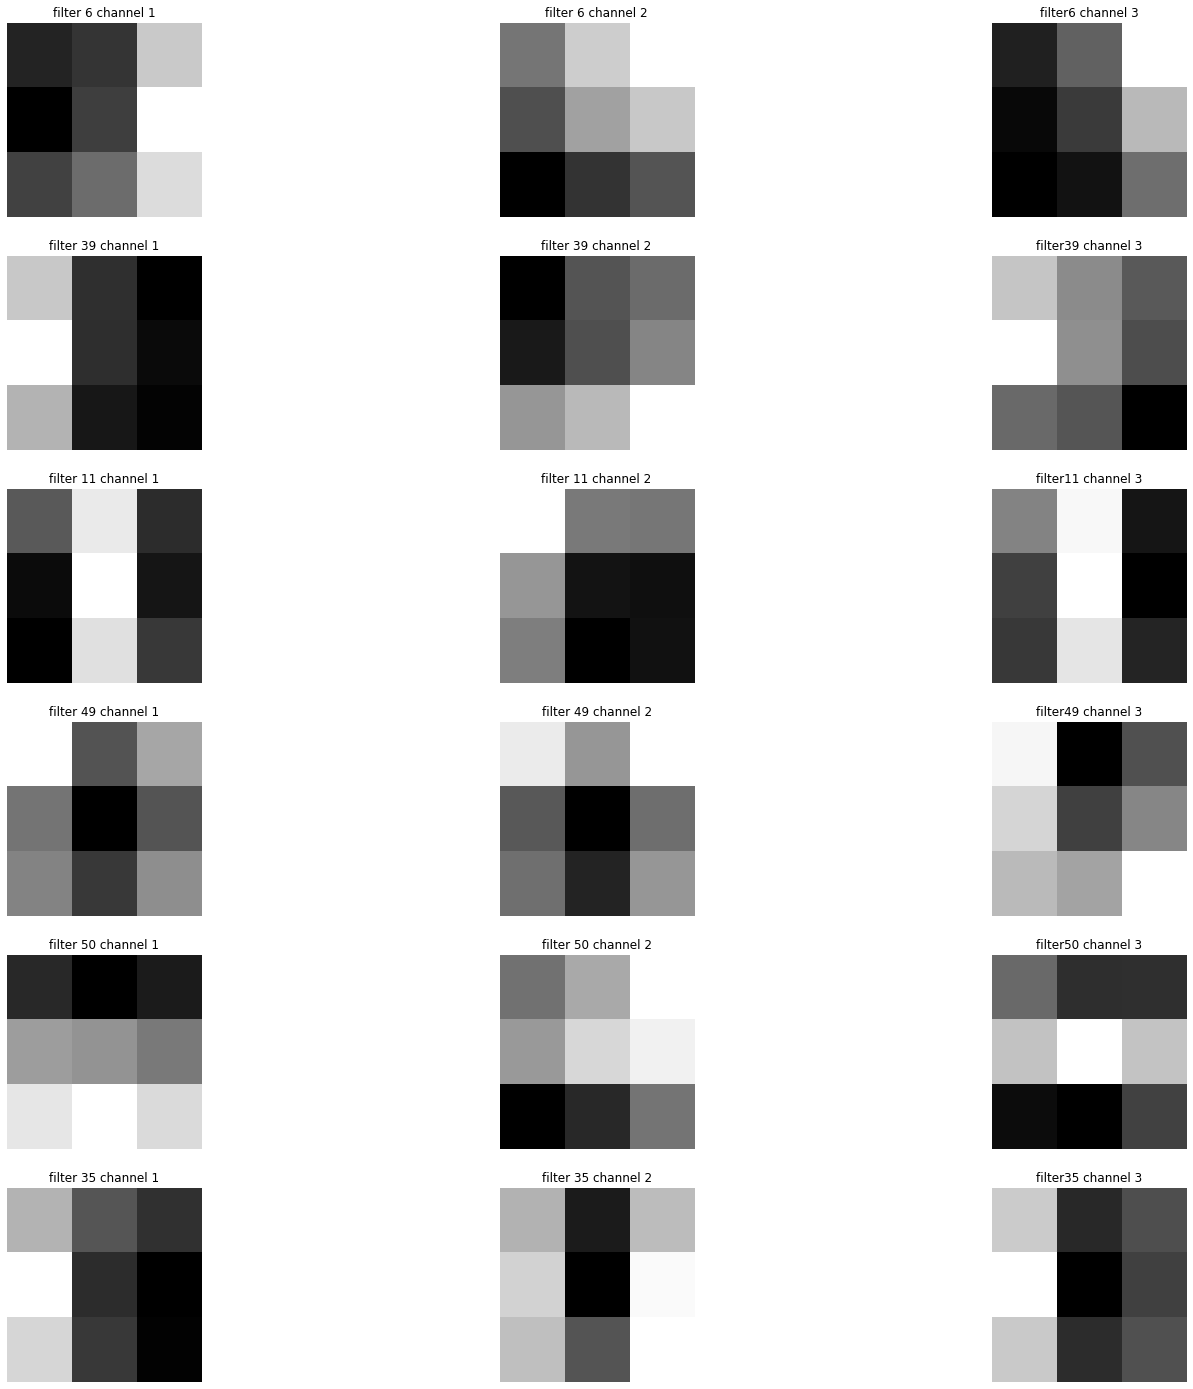

In [29]:
weights,biases = model.layers[2].get_weights() # Retrieving weights from the second layer
#Normalizing filters to be in [0,1]
f_min,f_max = weights.min(),weights.max()
weights = (weights - f_min)/(f_max - f_min) #weights shape = (3,3,3,64)

no_filters = 6
ix = 1

# for i in range(no_filters):
#     f = weights[:,:,:,i] # (3,3,3)
#     # Need to plot each channel separately. 
#     for j in range(3):
#         ax = pyplot.subplot(no_filters,3,ix)
#         ax.set_xticks([])
#         ax.set_yticks([])
#         #Showcasing each channel 
#         pyplot.imshow(f[:,:,j],cmap = 'gray')
#         ix +=1

# pyplot.show()

import random
import matplotlib.pyplot as plt
rand_list = random.sample(range(0,weights.shape[3]),no_filters)
figure, axes = plt.subplots(nrows=no_filters, ncols=3,figsize=(25,25))
for index,val in enumerate(rand_list):
    f = weights[:,:,:,val] # (3,3,3)

    axes[index,0].set_title('filter {} channel 1'.format(val))
    axes[index,0].imshow(f[:,:,0], cmap='gray')
    axes[index,0].axis('off')

    axes[index,1].set_title('filter {} channel 2'.format(val))
    axes[index,1].imshow(f[:,:,1], cmap='gray')
    axes[index,1].axis('off')

    axes[index,2].set_title('filter{} channel 3'.format(val))
    axes[index,2].imshow(f[:,:,2], cmap='gray')
    axes[index,2].axis('off')
        


The expectation would be that the feature maps close to the input detect small or fine-grained detail, whereas feature maps close to the output of the model capture more general features. 

In [ ]:


def plot_features(weights,no_filters):
    
    rand_list = random.sample(range(0,weights.shape[3]),no_filters)
    figure, axes = plt.subplots(nrows=no_filters, ncols=3,figsize=(25,25))
    for index,val in enumerate(rand_list):
        f = weights[:,:,:,val] # (3,3,3)

        axes[index,0].set_title('filter {} channel 1'.format(val))
        axes[index,0].imshow(f[:,:,0], cmap='gray')
        axes[index,0].axis('off')

        axes[index,1].set_title('filter {} channel 2'.format(val))
        axes[index,1].imshow(f[:,:,1], cmap='gray')
        axes[index,1].axis('off')

        axes[index,2].set_title('filter{} channel 3'.format(val))
        axes[index,2].imshow(f[:,:,2], cmap='gray')
        axes[index,2].axis('off')

In [3]:
new_model = VGG16(weights = 'imagenet',include_top = True)
layer = 1
model_extract_layer = Model(inputs = new_model.input,outputs = new_model.layers[layer].output)
img_path = '1.jpg'
img = image.load_img(img_path, target_size = (224,224))
x = image.img_to_array(img) #Converting to numpy
x = np.expand_dims(x,axis=0) #expaind from 3D to 4D where the new dimension is the number of examples
x = preprocess_input(x) # Pixel values are scaled to be zero-centered
feature_maps = model_extract_layer.predict(x) #shape = (1,224,224,64)
print(feature_maps.shape) 



(1, 224, 224, 64)


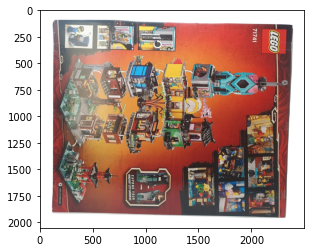

In [12]:
y = plt.imread('1.jpg')
plt.imshow(y)

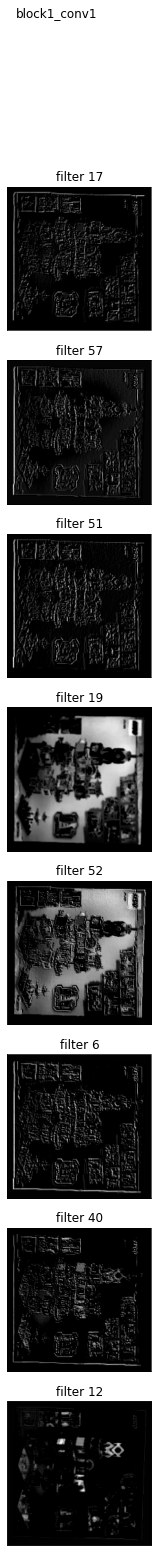

In [44]:
no_filters = 8
rand_list = random.sample(range(0,feature_maps.shape[3]),no_filters)
figure, axes = plt.subplots(nrows=no_filters, ncols=1,figsize=(25,25))
figure.suptitle(new_model.layers[layer].name)
for index,val in enumerate(rand_list):
    f = feature_maps[0,:,:,val] # ((112,112)
    
    axes[index].set_title('filter {}'.format(val))
    axes[index].imshow(f, cmap='gray')
    axes[index].axis('off')

In [11]:
def visualize_feature_map(model,layer_no,subplot_size,img_path):
    """
    Function displays the feature map of the desired layer
    Arguments
    model: Input the model that you have created. 
    layer_no: list of integers of all the layers to be displayed
    subplot_size: tuple, specify number of rows and columns. The number of filters displayed for each block will be rows*columns
    img: Pass in the Image that will be used for the model to predict and generate the filters. 
    """
    outputs = [model.layers[i].output for i in layer_no]
    model_extract_layer = Model(inputs = model.input,outputs = outputs)
    
    img = image.load_img(img_path, target_size = (224,224))
    x = image.img_to_array(img) #Converting to numpy
    x = np.expand_dims(x,axis=0) #expaind from 3D to 4D where the new dimension is the number of examples
    x = preprocess_input(x) # Pixel values are scaled to be zero-centered
    feature_maps = model_extract_layer.predict(x) #list of numpy arrays of shapes based on the layers
    
    
    rows,cols = subplot_size
    
    for index,fmap in enumerate(feature_maps):
        rand_no = random.sample(range(0,fmap.shape[3]),rows*cols)
        figure, axes = plt.subplots(nrows=rows, ncols=cols,figsize=(15,15))
        print(model.layers[index].name)
        for i in range(rows):
            for j in range(cols):
#                 axes[index,0].set_title('filter {} channel 1'.format(val))
                axes[i,j].imshow(fmap[0,:,:,rand_no[i+j]], cmap='gray')
                axes[i,j].axis('off')
        
        plt.tight_layout()
        plt.show()


input_2


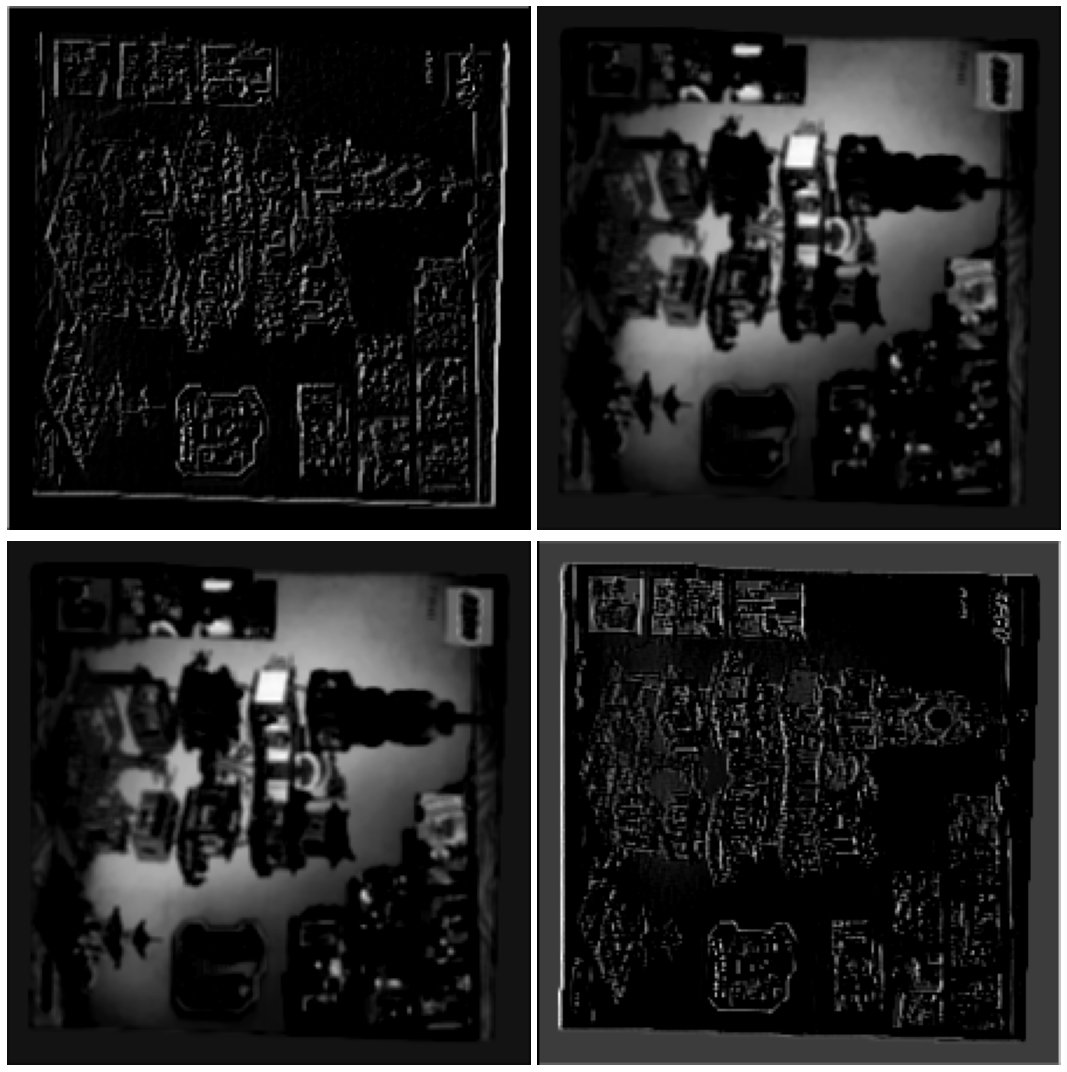

block1_conv1


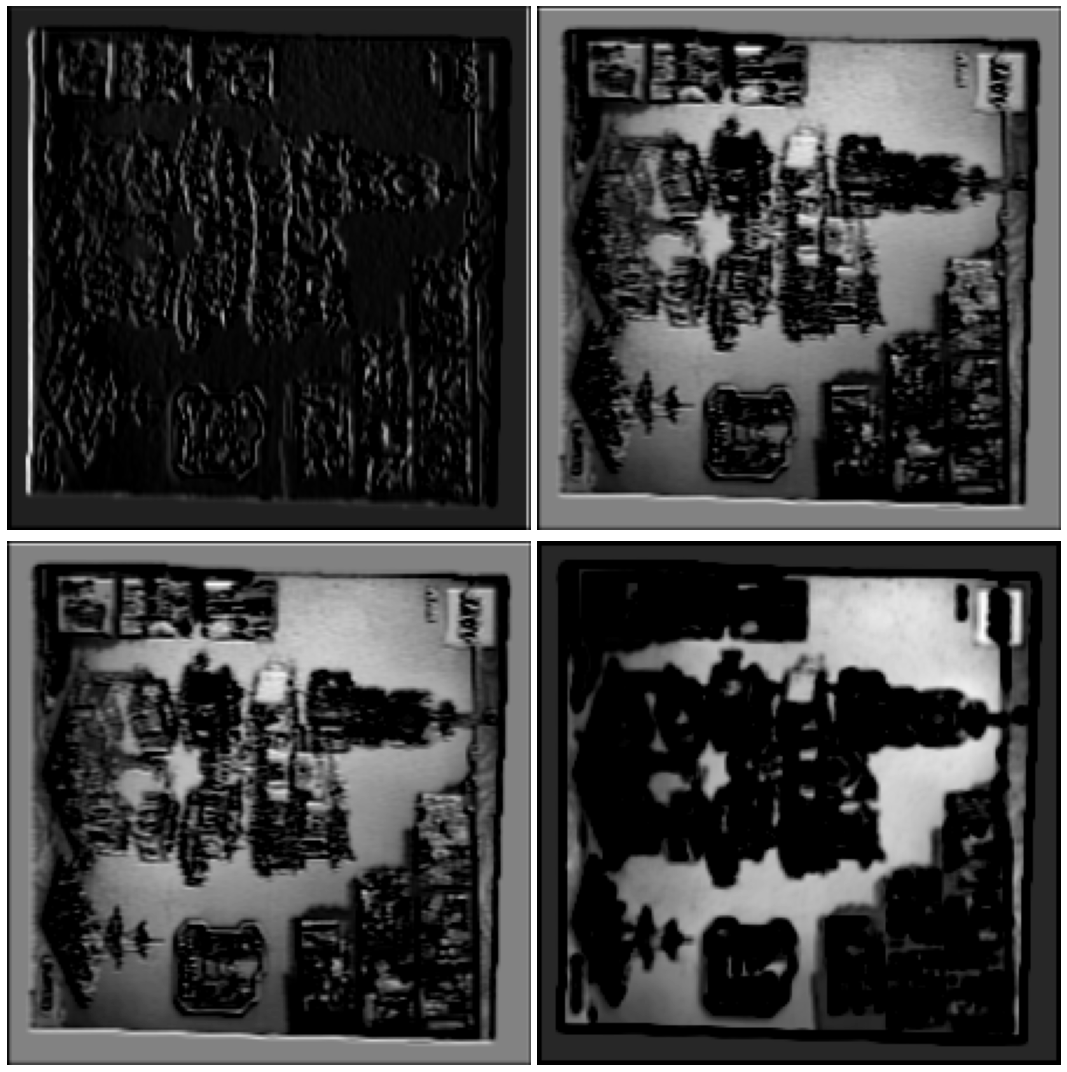

block1_conv2


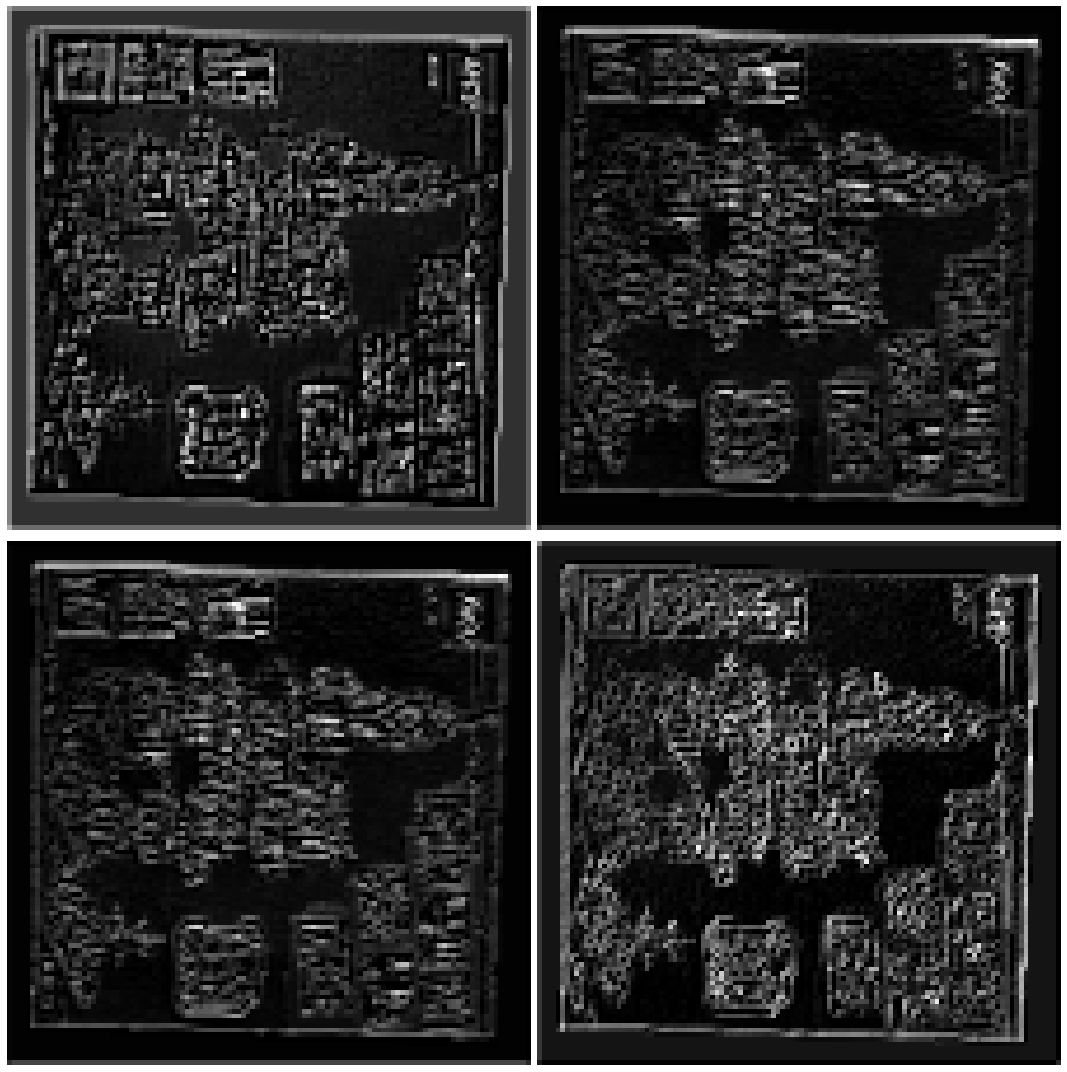

block1_pool


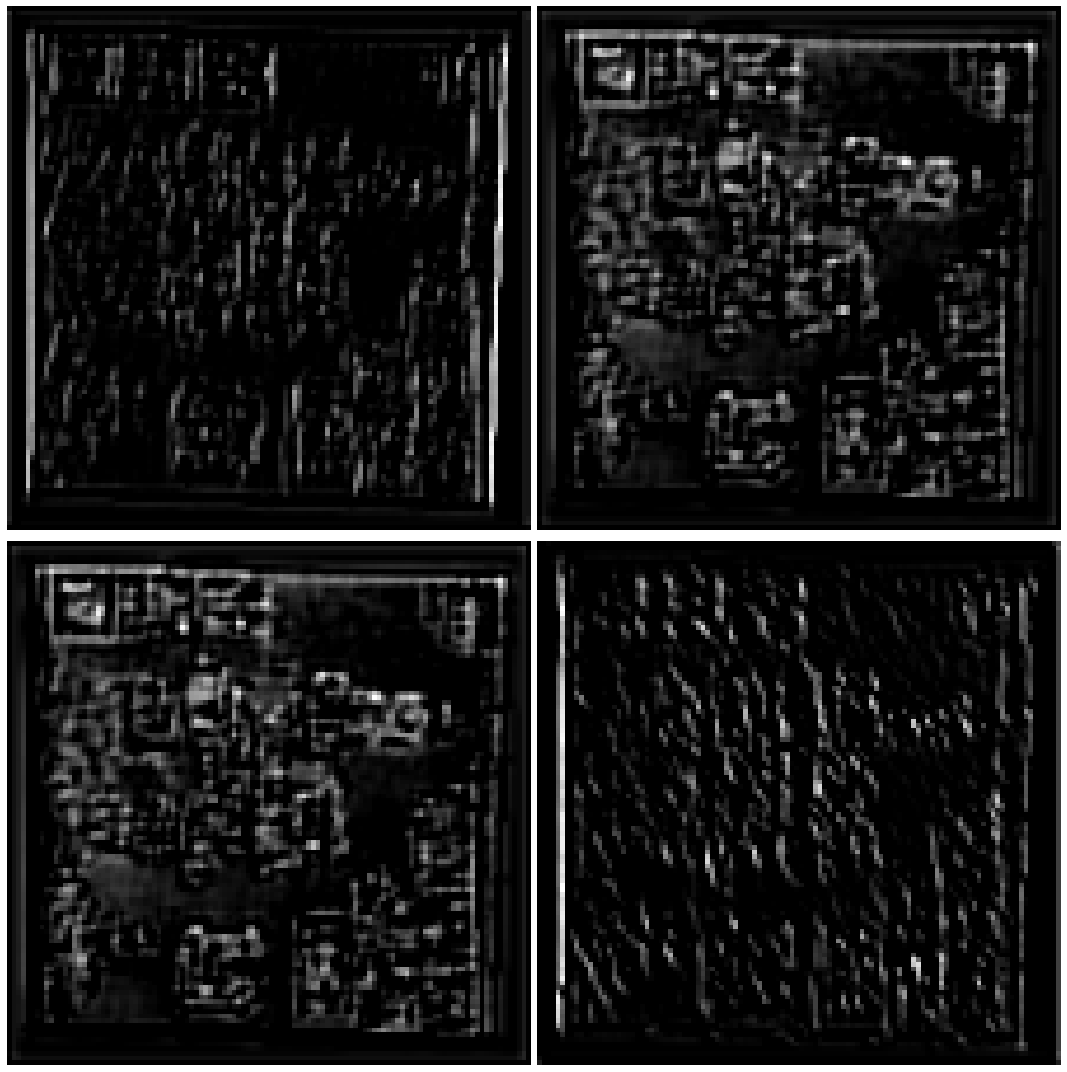

block2_conv1


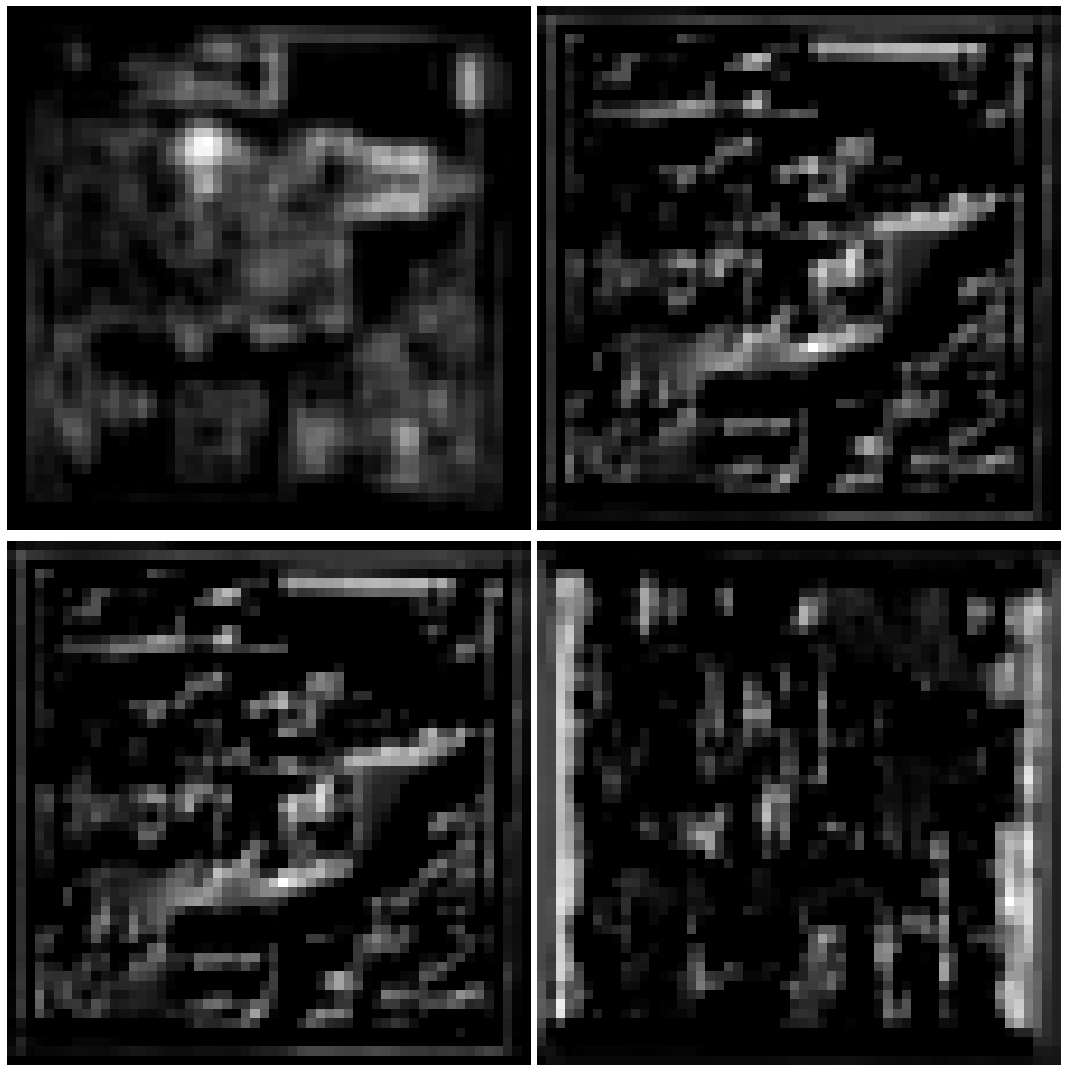

In [14]:
visualize_feature_map(new_model,[1,2,3,5,7],(2,2),'1.jpg')

In [65]:
def visualize_feature_maps(model,layer_no,no_filters,img_path):
    """
    Function displays the feature map of the desired layer
    Arguments
    model: Input the model that you have created. 
    layer_no: list of integers of all the layers to be displayed
    no_filter: How many filters do you want to be displayed.
    img: Pass in the Image that will be used for the model to predict and generate the filters. 
    """
    outputs = [model.layers[i].output for i in layer_no]
    model_extract_layer = Model(inputs = model.input,outputs = outputs)
    img = image.load_img(img_path, target_size = (224,224))
    x = image.img_to_array(img) #Converting to numpy
    x = np.expand_dims(x,axis=0) #expaind from 3D to 4D where the new dimension is the number of examples
    x = preprocess_input(x) # Pixel values are scaled to be zero-centered
    feature_maps = model_extract_layer.predict(x) #list of numpy arrays of shapes based on the layers
    square = 8
    for fmap in feature_maps:
        rand_no = random.sample(range(0,fmap.shape[3]),64)
        ix = 1
        for _ in range(no_filters):
            for _ in range(no_filters):
                ax = pyplot.subplot(square,square,ix)
                ax.set_xticks([])
                ax.set_yticks([])
                pyplot.imshow(fmap[0,:,:,ix-1],cmap='gray')
                ix += 1
        pyplot.show()

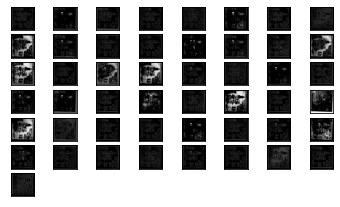

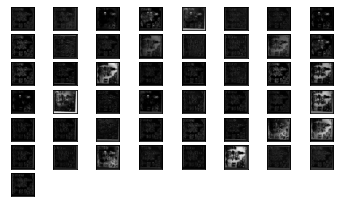

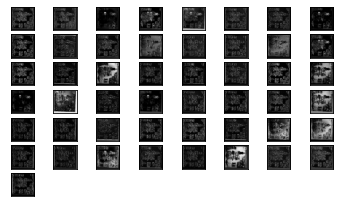

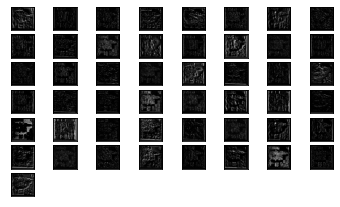

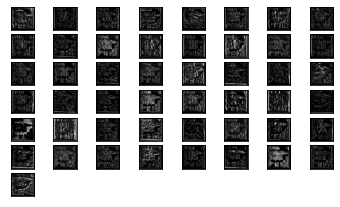

In [59]:
# new_model = VGG16(weights = 'imagenet',include_top = True)
visualize_feature_maps(new_model,[1,2,3,5,6],7,'1.jpg')

In [13]:
new_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     